# EDA

## Prerequisites

The Yelp dataset is compromised of multiple JSONs based on user, business, review, etc. After constructing a database to manage the load of all the JSONs (+10GB), we queried the database to return a 5% sample of only essential columns for exploration. Documentation will be below. 

Otherwise, we're mainly just importing necessary packages, checking the dtypes, and first few rows. 

In [83]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

yelp_sample = pd.read_csv('under-sample.csv', index_col='Unnamed: 0')

In [84]:
yelp_sample.head()

business_id                 user_id  \
0  ZeJjnl4o5sffMxPTt7h6ug  CNPZ2ZjDu-lNPKi6f5wEIA   
1  Ccs-77XZCWf1aOozv6U-Ww  nJVAtTBB-25RiomzBB8bHw   
2  FHdgpBT2Br7BL-V3gglIkA  zZOjl_mlBoqJN22dD5nbpQ   
3  FHdgpBT2Br7BL-V3gglIkA  DWO5d7GJWB2Mmuv67yY_fQ   
4  FHdgpBT2Br7BL-V3gglIkA  fJrZ-1B0ngdgM_2qQY_6BA   

                                                text  cool  stars  \
0  I tried to give this company the benefit of th...     0    1.0   
1  We ended up here through serendipity... White ...     0    5.0   
2  Bouncers were actively enforcing CDC/ social d...     0    5.0   
3  Its a place that I comfortable but I hate when...     0    2.0   
4  Great food and great staff! There racks Mack b...     0    5.0   

                        date  funny               review_id  useful  \
0  2015-09-09 15:02:48+00:00      0  Zs2sKoUKASUe_WsGpQuE8A       5   
1  2017-11-18 19:59:59+00:00      0  Eju6FaSp93TC_g06mwwFzA       0   
2  2020-06-27 04:51:22+00:00      0  ulSlOe8dnv8mjLvLtly8hQ       0   
3  2016-01-08 22:35:17+00:00      0  dISAAuF9njJb6pT2J1ILuQ       0   
4  2019-04-12 20:31:51+00:00      0  MlSZu7iI4pbCl7MY0eFXgA       0   

   average_user_stars  ...               address  city state   latitude  \
0                2.20  ...      241 Boro Line Rd   kop    PA  40.102683   
1                2.82  ...       209 Vineyard Rd  Atco    NJ  39.738343   
2                3.67  ...  286 White Horse Pike  Atco    NJ  39.772589   
3                3.85  ...  286 White Horse Pike  Atco    NJ  39.772589   
4                3.67  ...  286 White Horse Pike  Atco    NJ  39.772589   

   longitude average_business_stars  recieved_reviews  \
0 -75.355972                    2.0                70   
1 -74.886403                    4.5                53   
2 -74.900347                    3.0                58   
3 -74.900347                    3.0                58   
4 -74.900347                    3.0                58   

                                          categories  \
0                    Automotive, Auto Repair, Towing   
1               Food, Arts & Entertainment, Wineries   
2  American (Traditional), Nightlife, Bars, Sport...   
3  American (Traditional), Nightlife, Bars, Sport...   
4  American (Traditional), Nightlife, Bars, Sport...   

                                          attributes  tip_review  
0            {'BusinessAcceptsCreditCards': 'False'}         NaN  
1  {'GoodForKids': 'False', 'RestaurantsPriceRang...         NaN  
2  {'Alcohol': "u'full_bar'", 'BusinessAcceptsCre...         NaN  
3  {'Alcohol': "u'full_bar'", 'BusinessAcceptsCre...         NaN  
4  {'Alcohol': "u'full_bar'", 'BusinessAcceptsCre...         NaN  

[5 rows x 23 columns]

In [85]:
yelp_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327662 entries, 0 to 327661
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   business_id             327662 non-null  object 
 1   user_id                 327662 non-null  object 
 2   text                    327662 non-null  object 
 3   cool                    327662 non-null  int64  
 4   stars                   327662 non-null  float64
 5   date                    327662 non-null  object 
 6   funny                   327662 non-null  int64  
 7   review_id               327662 non-null  object 
 8   useful                  327662 non-null  int64  
 9   average_user_stars      327661 non-null  float64
 10  yelping_since           327661 non-null  object 
 11  submitted_reviews       327661 non-null  float64
 12  name                    327662 non-null  object 
 13  address                 323650 non-null  object 
 14  city                    3

| Variable                  | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| business_id (object)      | 22 character unique string business id                                      |
| user_id (object)          | 22 character unique user id, maps to the user in user.json                  |
| text (object)             | the review itself                                                           |
| cool (int64)              | number of cool votes received on the review                                 |
| stars (float64)           | star rating of the review                                                   |
| date (object)             | date formatted YYYY-MM-DD for the review                                    |
| funny (int64)             | number of funny votes received                                              |
| review_id (object)        | 22 character unique review id                                               |
| useful (int64)            | number of useful votes received for the review                              |
| average_user_stars (float64) | average rating of all reviews for a user                                  |
| yelping_since (object)    | when the user joined Yelp, formatted like YYYY-MM-DD                        |
| submitted_reviews (float64) | the number of reviews they've written                                     |
| name (object)             | the user's first name                                                       |
| address (object)          | the full address of the business                                            |
| city (object)             | the city of the business                                                    |
| state (object)            | 2 character state code where the business is located, if applicable         |
| latitude (float64)        | latitude of business location                                               |
| longitude (float64)       | longitude of business location                                              |
| average_business_stars (float64) | star rating for a business, rounded to half-stars                       |
| received_reviews (int64)  | number of reviews a business has received                                   |
| categories (object)       | array of strings of business categories                                     |
| attributes (object)       | business attributes to values. note: some attribute values might be objects |
| tip_review (object)       | text of the tip left by a user                                              |


It will be nice to know how many businesses, users, and unique reviews are in the dataset. Here's a quick look into this

In [86]:
# Loop through Keys and print their length
for col in ['user_id', 'business_id', 'review_id']:
    print(f'There are {yelp_sample[col].nunique()} unique {col}s in the sample\n')
    
print(f'The length of the sample is {len(yelp_sample)} observations')

There are 231044 unique user_ids in the sample

There are 85697 unique business_ids in the sample

There are 326726 unique review_ids in the sample

The length of the sample is 327662 observations


This checks out. Many users go to the same businesses, so there should be more unique users. Additionally, the amount of unique `review_id` matches the length of the dataset. Meaning we can ensure no errors in the query that got us our sample

## Data Cleaning and Transformations

For the most part, the dataset is pretty clean. We can do basic checks for things like nulls and dropping unneeded columns, but the only big issue will be `category`, as it is stored in the JSONs as an object. We will have to find a way to generalize to better fit our objective

In [87]:
## [Jose Salerno] Dropping columns 
yelp_sample.drop(columns=['address', 'tip_review', 'attributes'], inplace=True)

Doing a quick check for null amounts per column here, just to ensure it's okay to drop nans without significant change to the dataset

In [88]:
## [Jose Salerno] checking nulls
yelp_sample.isna().sum()

business_id                0
user_id                    0
text                       0
cool                       0
stars                      0
date                       0
funny                      0
review_id                  0
useful                     0
average_user_stars         1
yelping_since              1
submitted_reviews          1
name                       0
city                       0
state                      0
latitude                   0
longitude                  0
average_business_stars     0
recieved_reviews           0
categories                29
dtype: int64

In [89]:
## [Jose Salerno] dropping null values
yelp_sample.dropna(inplace=True)

### Generalizing Category

`categories` might be pretty valuable towards the end of the analysis, considering we may want to apply some supervised techniques. However, a business can take on many specific categories, which are stored as an array in the `categories` column. Generalizing these will be necessary to apply any supervised ML later down the line.

In [90]:
print(f'There are {yelp_sample["categories"].nunique()} unique category arrays')
yelp_sample['categories'].unique()

There are 52591 unique category arrays


array(['Automotive, Auto Repair, Towing',
       'Food, Arts & Entertainment, Wineries',
       'American (Traditional), Nightlife, Bars, Sports Bars, Restaurants',
       ...,
       'Automotive, Auto Glass Services, Glass & Mirrors, Home Services, Windshield Installation & Repair',
       'Home & Garden, Shopping, Home Services, Lighting Fixtures & Equipment',
       'Medical Spas, Massage, Beauty & Spas, Health & Medical, Nail Salons, Hair Salons'],
      dtype=object)

We tried to consider lots of options (ChatGPT, association rules, thresholds, etc). Ultimately it made the most sense to brute force it, as this will be a one and done solution even if we scale the sample later. This is a little subjective, but there isn't much gray area in the dataset. Below is the process.

In [91]:
## [Jose Salerno] Generalization of distinct categories 
restaurant_categories = ['Food Stands','Brasseries','Cheese Shops','Fish & Chips','Szechuan','African','Malaysian','Acai Bowls','Waffles','Food', 'Local Flavor', 'Canadian (New)', 'Vietnamese', 'Italian', 'Buffets', 'Burgers', 'American (Traditional)', 'American (New)', 'Breakfast & Brunch', 'Sandwiches', 'Seafood', 'Mexican', 'Pizza', 'Cajun/Creole', 'Sushi Bars', 'Chinese', 'Japanese', 'Steakhouses', 'Cafes', 'Salad', 'Fast Food', 'Bakeries', 'Ice Cream & Frozen Yogurt', 'Desserts', 'Barbeque', 'Thai', 'Specialty Food', 'Asian Fusion', 'Southern', 'Diners', 'Mediterranean', 'Delis', 'Caterers', 'Chicken Wings', 'Vegetarian', 'Indian', 'Comfort Food', 'Latin American', 'French', 'Vegan', 'Greek', 'Gluten-Free', 'Tex-Mex', 'Korean', 'Soup', 'Donuts', 'Live/Raw Food', 'Tacos', 'Tapas/Small Plates', 'Gastropubs', 'Food Delivery Services', 'Pakistani', 'Tapas Bars', 'Cheesesteaks', 'Soul Food', 'Ethnic Food', 'Middle Eastern', 'German', 'Bagels', 'Food Trucks', 'Hot Dogs', 'Noodles', 'Creperies', 'Spanish', 'Caribbean', 'Chicken Shop', 'Ramen', 'Cuban', 'Irish', 'Basque', 'Halal', 'Dim Sum', 'New Mexican Cuisine', 'Poke', 'Seafood Markets', 'British', 'Gelato', 'Cupcakes', 'Ethiopian', 'Peruvian', 'Falafel', 'Custom Cakes', 'Pasta Shops', 'Kebab', 'Hot Pot', 'Puerto Rican', 'Dominican', 'Salvadoran', 'Cafeteria', 'Pancakes', 'Senegalese', 'Sri Lankan', 'Parent Cafes','Food Banks','Food Banks','Afghan','Izakaya','Indonesian','Imported Food','Venezuelan','Pretzels','Smokehouse','Shanghainese','Patisserie/Cake Shop','Kosher','Shaved Ice','Filipino','Personal Chefs','Chocolatiers & Shops','Irish Pub','Bed & Breakfast','Taiwanese','Brazilian','Modern European','Wraps','Cantonese','Hawaiian','Candy Stores']

beauty = ["Men's Hair Salons",'Nail Technicians','Beauty & Spas', 'Nail Salons', 'Cosmetics & Beauty Supply', 'Hair Salons', 'Massage', 'Skin Care', 'Waxing', 'Eyelash Service', 'Barbers', 'Tanning', 'Threading Services', 'Day Spas', 'Piercing', 'Blow Dry/Out Services', 'Makeup Artists', 'Hair Removal', 'Eyebrow Services', 'Hair Stylists', 'Tattoo', 'Laser Hair Removal', 'Massage Therapy', 'Pedicures', 'Medical Spas', 'Hair Extensions', 'Reflexology', 'Hair Loss Centers', 'Acupuncture', 'Pole Dancing Classes', 'Float Spa', 'Cryotherapy', 'Sugaring', 'Permanent Makeup', 'Saunas','Massage Schools']

bars = ['Beer Gardens','Wineries','Bars', 'Nightlife', 'Beer', 'Wine Bars', 'Cocktail Bars', 'Sports Bars', 'Pubs', 'Breweries', 'Gastropubs', 'Beer Bar', 'Wine Tasting Room', 'Dive Bars', 'Karaoke', 'Speakeasies', 'Gay Bars', 'Juice Bars & Smoothies', 'Hookah Bars', 'Brewpubs', 'Cigar Bars', 'Champagne Bars', 'Tiki Bars','Meaderies','Distilleries','Whiskey Bars']

hotels = ['Hotels','Resorts']

auto = ['Gas Stations','Used','Auto Repair','Car Dealers','Oil Change Stations','Auto Parts & Supplies','Tires','Car Wash','Body Shops','Car Rental','Auto Detailing','Auto Loan Providers','Trailer Rental','Departments of Motor Vehicles','Motorcycle Rental','Mobile Dent Repair','Motorsport Vehicle Dealers','Bike tours','Crane Services','Auto Insurance','Car Share Services','Motorsport Vehicle Repairs','Wheel & Rim Repair','Transmission Repair','Windshield Installation & Repair','Auto Glass Services','Used Car Dealers']

venues = ['Wedding Planning','Venues & Event Spaces','Party & Event Planning','Music Venues']

fitness = ['Fitness & Instruction','Gyms','Kickboxing','Aerial Fitness','Yoga']

entertainment = ['Cinema','Museums','Tours','Performing Arts','Arts & Crafts','Jazz & Blues','Landmarks & Historical Buildings','Golf','Art Galleries','Festivals','Stadiums & Arenas','Zoos','Hiking','Bike Rentals','Playgrounds','Professional Sports Teams','Recreation Centers','Art Tours','Country Clubs','Decks & Railing','Mountain Biking','Dinner Theater','Tabletop Games','Aerial Tours','Party Bike Rentals','Game Truck Rental','Psychic Mediums', "Walking Tours", "Boat Tours", "Brewery Tours", "Wine Tours", "Air Tours", "Hot Air Balloons",  "Aerial Tours",'Buses','Firearm Training','Disc Golf','High Fidelity Audio Equipment','Vacation Rental Agents','Matchmakers','Free Diving','Ranches','Bicycles','Farm Equipment Repair','Golf Lessons','Racing Experience','Face Painting','Botanical Gardens','Comedy Clubs','Sports Clubs','Gun/Rifle Ranges','Amusement Parks','Photographers','Cards & Stationery','Fishing','Boat Charters','Bowling','Arcades','Airports','Escape Games','Boating','Casinos','Beaches','Art Museums']

medical = ['Hospitals','Urgent Care','Doctors','Dentists','General Dentistry','Eyewear & Opticians','Medical Centers','Cosmetic Dentists','Chiropractors','Optometrists','Reflexology','Orthodontists','Periodontists','Medical Cannabis Referrals','Pain Management','Surgeons','Allergists','Anesthesiologists','Body Contouring','Dialysis Clinics','Reproductive Health Services','Memory Care','Preventive Medicine','Lice Services','Medical Transportation','Prosthodontists','CPR Classes','Retina Specialists','Nephrologists','Sex Therapists','Ophthalmologists','Obstetricians & Gynecologists','Dermatologists','Physical Therapy','Oral Surgeons','Pharmacy','Pediatric Dentists','Family Practice','Diagnostic Services']

nightlife = ['Dance Clubs','Strip Clubs','Adult Entertainment','Dance Clubs']

home_services = ['Garage Door Services','Laundry Services','Nurseries & Gardening','Home & Garden','Building Supplies','Movers','Apartments','Real Estate','Contractors','Heating & Air Conditioning/HVAC','Furniture Stores','Home Decor','Plumbing','Appliances & Repair','Mattresses','Sewing & Alterations','Home Cleaning','Appliances','Pest Control','Property Management','Landscaping','Kitchen & Bath','Real Estate Agents','Electricians','Carpeting','Packing Services','Commercial Real Estate','Decks & Railing','Chimney Sweeps','Countertop Installation','Home Network Installation','Roof Inspectors','Outdoor Power Equipment Services','Home & Rental Insurance','House Sitters','Assisted Living Facilities','Bounce House Rentals','Awnings','Safety Equipment','Internet Service Providers','Windows Installation','Roofing','Carpet Cleaning','Flooring','Security Systems','Keys & Locksmiths','Tree Services','Water Heater Installation/Repair']

shopping = ['Electronics','Mobile Phones','Bridal','Discount Store','Hardware Stores','Antiques','Department Stores','Jewelry','Fashion','Sporting Goods',"Women's Clothing",'Drugstores','Convenience Stores','Accessories','Trainers','Health Markets','Shopping Centers','Shoe Stores','Thrift Stores',"Men's Clothing",'Piercing','Tobacco Shops','Hobby Shops','Shoe Repair','Screen Printing/T-Shirt Printing','Rugs','Hunting & Fishing Supplies','Wigs','Sunglasses','Hockey Equipment','Storefront Clinics','Snorkeling','Perfume','Local Fish Stores','Concept Shops','Jewelry Repair','Bike Repair/Maintenance','Watches','Guns & Ammo','Vape Shops',"Children's Clothing",'Mobile Phone Repair','Spray Tanning','Electronics Repair','Computers','Sports Wear','Bikes','Toy Stores','Printing Services','Music & DVDs','Bookstores','Outdoor Gear','IT Services & Computer Repair','Street Vendors']

coffee_tea = ['Bubble Tea','Coffee Roasteries','Tea Rooms','Internet Cafes']

pets = ['Pet Services','Veterinarians','Pet Stores','Pet Hospice','Pet Insurance','Pet Photography','Pet Groomers','Pets']

groceries = ['Fruits & Veggies','Wholesale Stores','Wholesalers','Organic Stores','Farmers Market','Meat Shops']

legal = ['Public Services & Government','Shipping Centers','Self Storage','Legal Services','Divorce & Family Law','Billing Services','Land Surveying','Fingerprinting','Traffic Ticketing Law','Investing','Excavation Services','Aestheticians','Environmental Abatement','Junk Removal & Hauling','Legal Services','Home Inspectors','Towing','Couriers & Delivery Services','Financial Services','Notaries','Real Estate Services','Transportation']

florist = ['Florists','Gift Shops']

education = ['Books','Bookbinding','Career Counseling','Tutoring Centers','Parenting Classes','Buddhist Temples','Architects','Religious Schools','Vocal Coach','Self-defense Classes','Bail Bondsmen','Day Camps','Smog Check Stations','Bookbinding','Religious Organizations','Community Service/Non-Profit','Specialty Schools','Education']

In [92]:
## [Jose Salerno] splitting the categories column to create a new general category 
# all categories are pretty closely related so the first index should give enough info to generalize
yelp_sample['category'] = yelp_sample['categories'].str.split(',').str[0].str.strip()

# assign a category frequency threshold and filter on it
categories = yelp_sample['category'].value_counts()
selected_categories = categories[categories > 50].index.tolist()

pruned = yelp_sample[yelp_sample['category'].isin(selected_categories)]

In [93]:
## [Jose Salerno] Creating General Category with the prespecified lists of categories
# maps each isin to the list of Generalized Categories, else 'Other'
pruned['general_category'] = np.select(
    [
        pruned['category'].isin(restaurant_categories),
        pruned['category'].isin(beauty),
        pruned['category'].isin(bars),
        pruned['category'].isin(hotels),
        pruned['category'].isin(auto),
        pruned['category'].isin(venues),
        pruned['category'].isin(fitness),
        pruned['category'].isin(entertainment),
        pruned['category'].isin(medical),
        pruned['category'].isin(nightlife),
        pruned['category'].isin(home_services),
        pruned['category'].isin(shopping),
        pruned['category'].isin(coffee_tea),
        pruned['category'].isin(pets),
        pruned['category'].isin(groceries),
        pruned['category'].isin(legal),
        pruned['category'].isin(florist),
        pruned['category'].isin(education)
    ],
    [
        'Restaurant',
        'Beauty',
        'Bars',
        'Hotels',
        'Auto',
        'Venues',
        'Fitness',
        'Entertainment',
        'Medical',
        'Nightlife',
        'Home_Services',
        'Shopping',
        'Coffee_Tea',
        'Pets',
        'Groceries',
        'Legal',
        'Florist',
        'Education'
    ],
    default='Other'
)

/var/folders/x3/42y9jxy964lg3yyk_9zhss280000gn/T/ipykernel_65490/1400423589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pruned['general_category'] = np.select(


In [94]:
## [Jose Salerno] Checking value counts of each category
pruned['general_category'].value_counts()

general_category
Restaurant       138581
Other             94800
Bars              31021
Beauty            14811
Shopping           6790
Home_Services      6663
Auto               6266
Entertainment      4365
Medical            2909
Pets               2814
Hotels             2158
Legal              1953
Venues             1876
Fitness            1093
Education           887
Coffee_Tea          550
Groceries           541
Nightlife           393
Florist             265
Name: count, dtype: int64

We've reduced the amount of categories drastically. Hopefully this will pay off in the long run.

## General Insights

In [95]:
pruned.describe().transpose()

count        mean         std         min  \
cool                    318736.0    0.523204    2.467280    0.000000   
stars                   318736.0    3.756959    1.470497    1.000000   
funny                   318736.0    0.337919    1.678052    0.000000   
useful                  318736.0    1.197489    3.227443    0.000000   
average_user_stars      318736.0    3.749061    0.855493    1.000000   
submitted_reviews       318736.0  128.845609  365.043849    0.000000   
latitude                318736.0   35.950989    5.350242   27.555127   
longitude               318736.0  -89.746021   14.861227 -120.095137   
average_business_stars  318736.0    3.753315    0.743045    1.000000   
recieved_reviews        318736.0  377.290385  743.014910    5.000000   

                              25%         50%         75%           max  
cool                     0.000000    0.000000    0.000000    400.000000  
stars                    3.000000    4.000000    5.000000      5.000000  
funny                    0.000000    0.000000    0.000000    241.000000  
useful                   0.000000    0.000000    1.000000    400.000000  
average_user_stars       3.400000    3.890000    4.290000      5.000000  
submitted_reviews        7.000000   25.000000  103.000000  17473.000000  
latitude                29.964702   38.603630   39.942863     53.656598  
longitude              -90.305181  -86.227026  -75.512763    -74.661348  
average_business_stars   3.500000    4.000000    4.500000      5.000000  
recieved_reviews        46.000000  141.000000  375.000000   7568.000000

Variance seems to be decent here, considering lots of the numerical values for ratings, users, and businesses are on a 0-5 ordinal scale

### Visualizing Insights

#### Most Frequent Categories

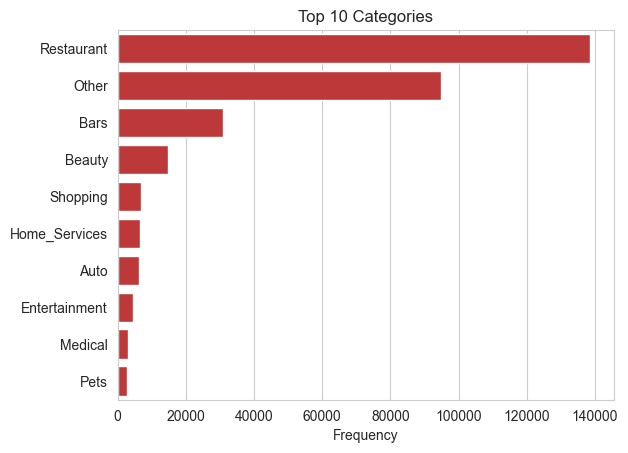

In [96]:
top_10_categories = pruned['general_category'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)
sns.barplot(top_10_categories, x='count', y='general_category', color='#d32323')

plt.title('Top 10 Categories')
plt.ylabel(None)
plt.xlabel('Frequency');

#### Business Location Density (on map)

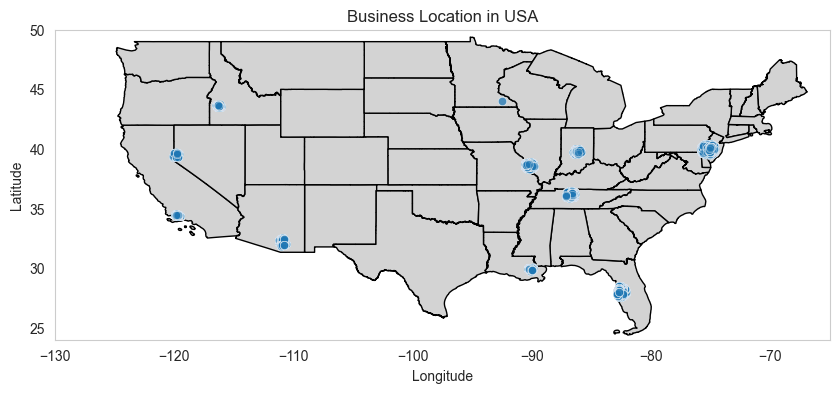

In [99]:
usa = gpd.read_file('tl_2023_us_state.shx')
geometry = [Point(lon, lat) for lon, lat in zip(pruned['longitude'], pruned['latitude'])]
gdf = gpd.GeoDataFrame(pruned, geometry=geometry, crs='EPSG:4326')

ax = usa.plot(figsize=(10, 10), color='lightgray', edgecolor='black')
sns.scatterplot(data=pruned, x='longitude', y='latitude', alpha=.5, color='#d32323')

ax.set_title('Business Location in USA')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim([-130, -65])
ax.set_ylim([24, 50])  
plt.grid(visible=False)
plt.show()

#### Distribution of Business and User Ratings

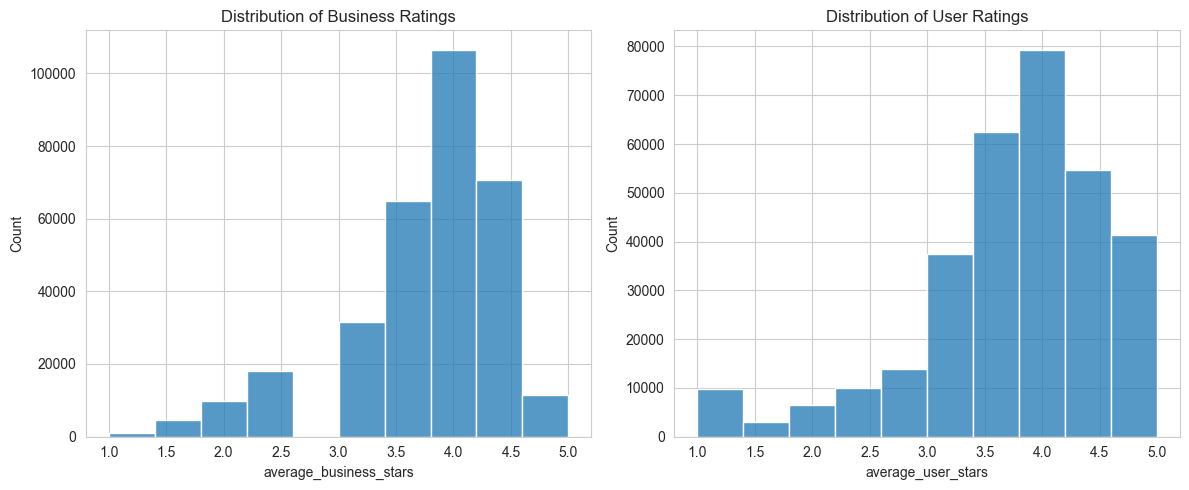

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# business hist
sns.histplot(pruned['average_business_stars'], bins=10, ax=axs[0], color='#d32323')
axs[0].set_title('Distribution of Business Ratings')

# user hist
sns.histplot(pruned['average_user_stars'], bins=10, ax=axs[1], color='#d32323')
axs[1].set_title('Distribution of User Ratings')

plt.tight_layout()
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


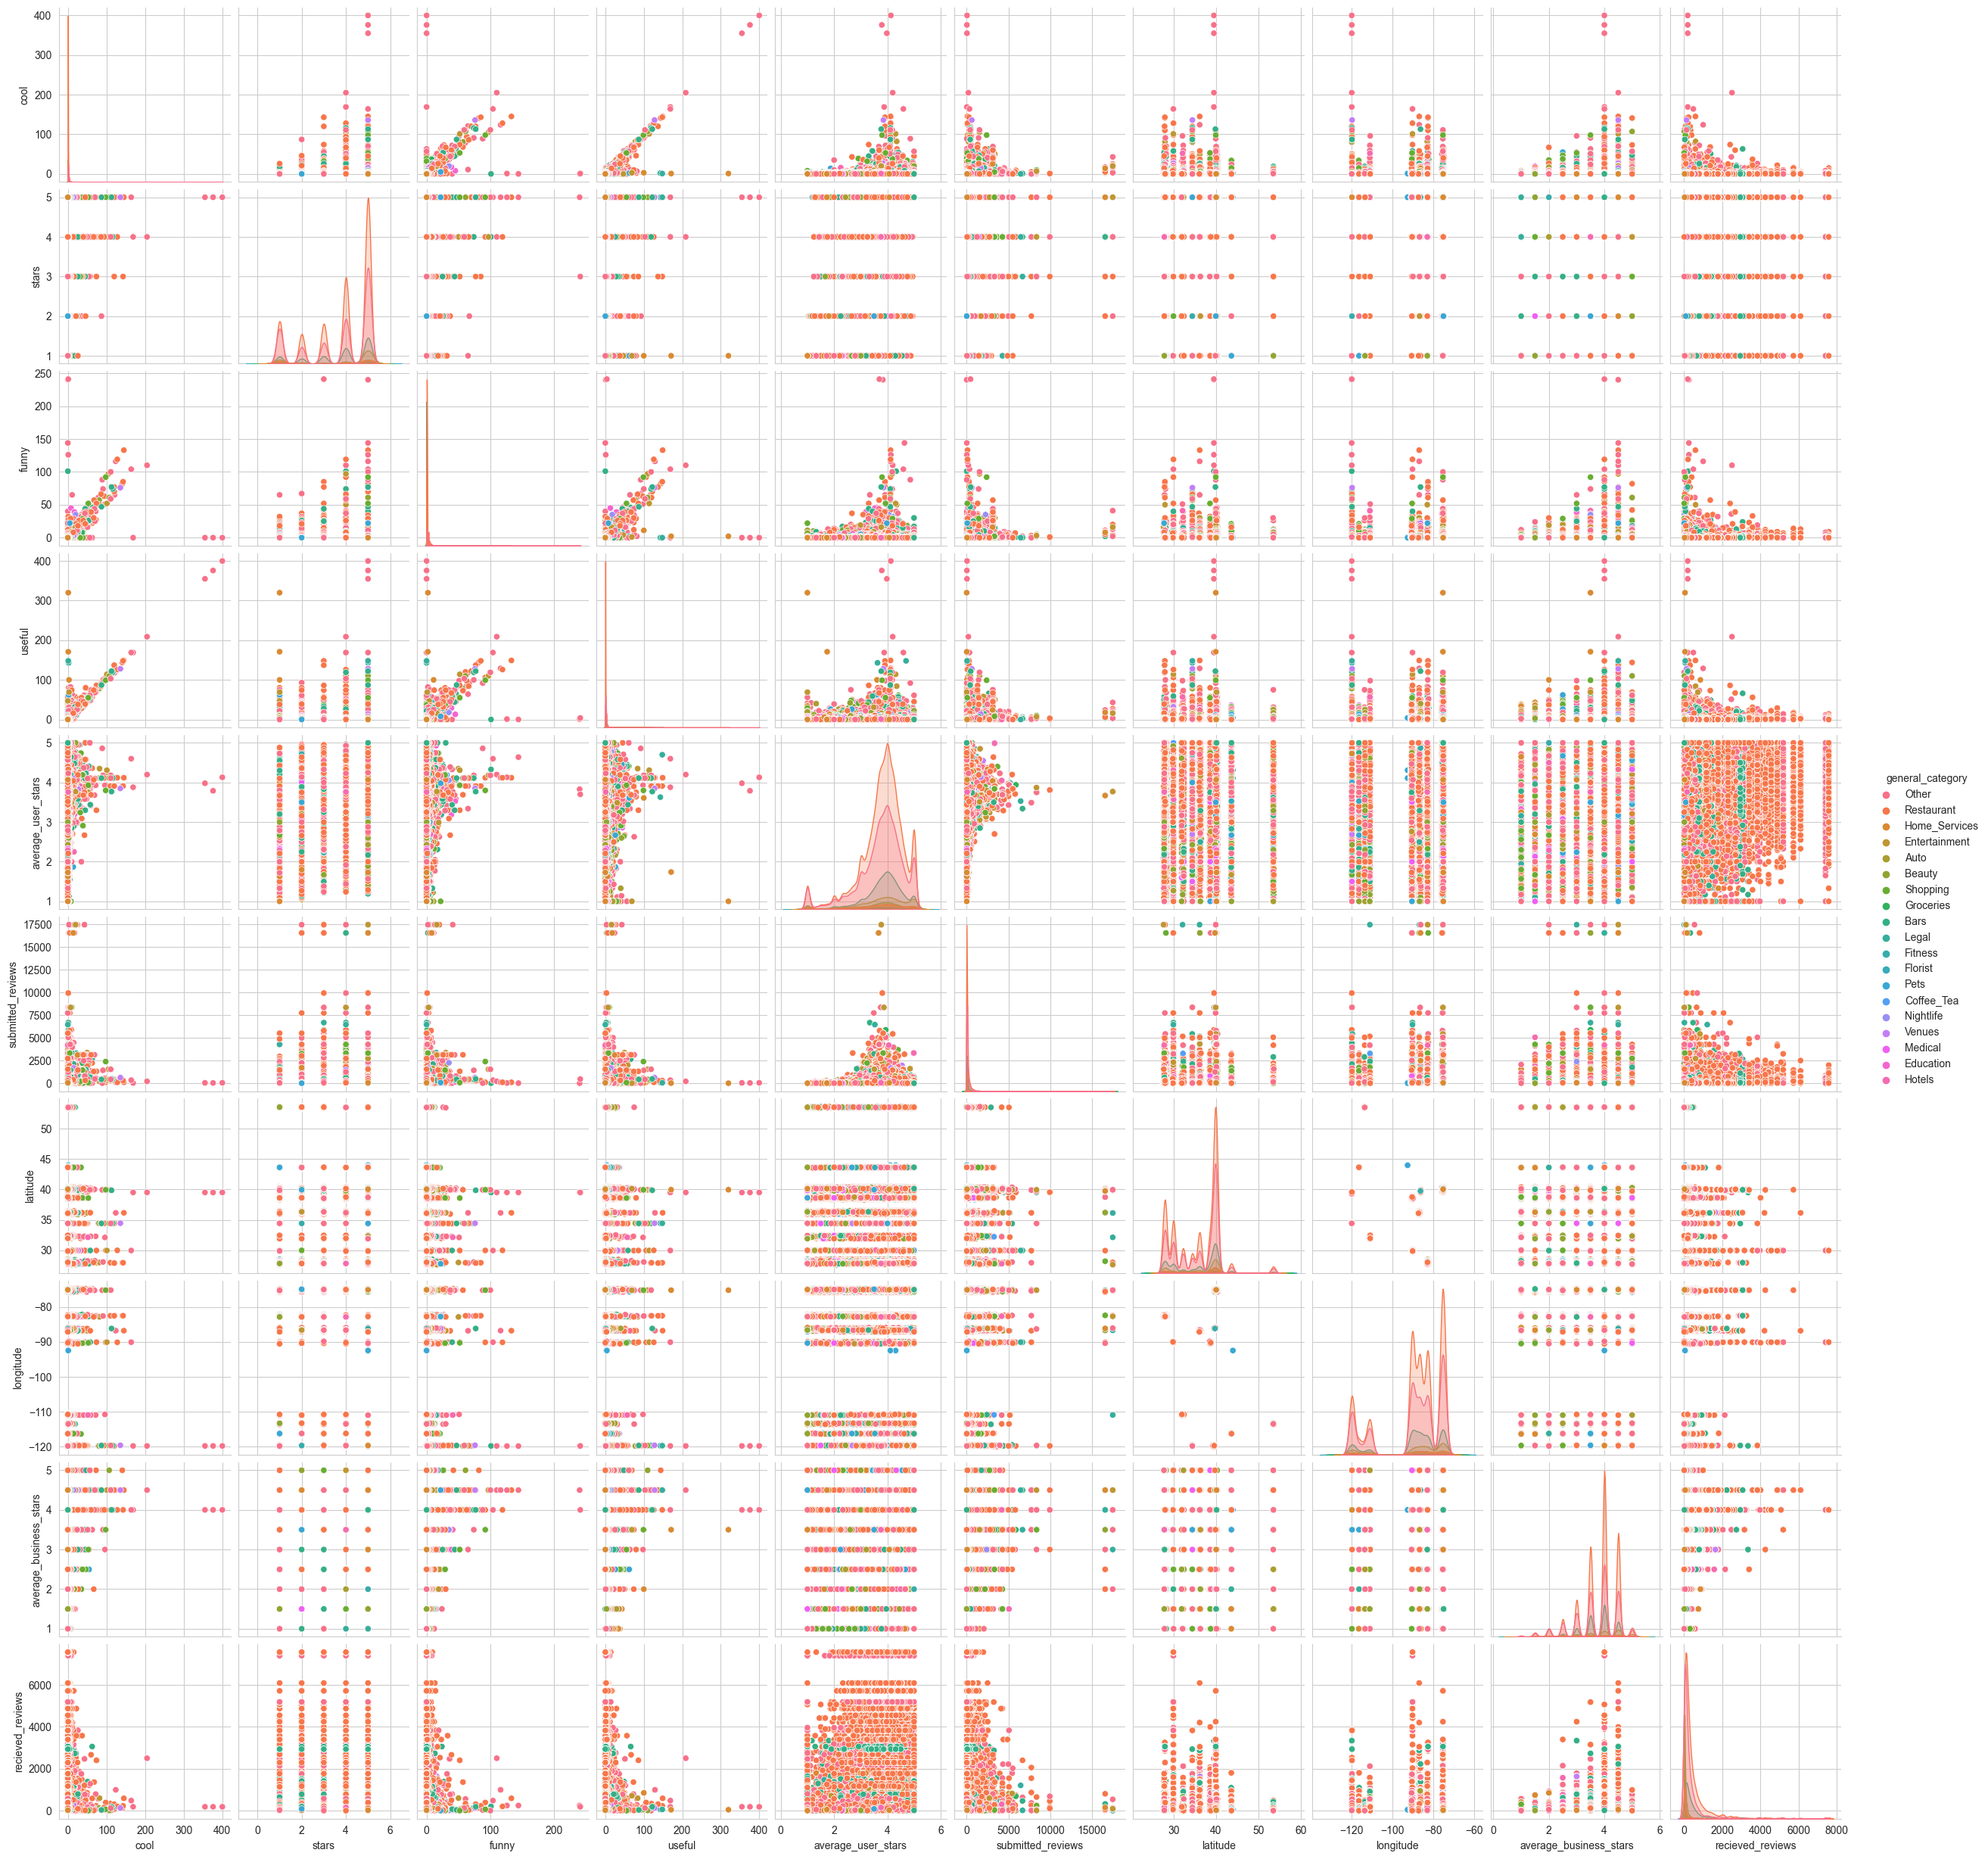

In [104]:
sns.pairplot(data=pruned, hue='general_category')